In [1]:
################################################################
# This is where the comparsion to the exo data starts 
# the hope it to see how well it match the theory
################################################################
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
%matplotlib inline

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def Fermi(E,Per):
    E = E+.166*(1-Per)
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    return A

In [3]:
## Defines constants and exposures
Q = 2.4578
Xval = np.linspace(0, Q, 1000)

T_half = 2.165e21  # in years
exo_expo = 177600   # exposure in g*yr
Na = 6.02e23       #atoms/mol
molar_mass = 136   # Xe molar mass in g
Natoms = exo_expo/molar_mass*Na
Nexpt = Natoms/T_half

In [4]:

# calculates the percent of the spectrum from exos data 
# since there data was only above 1MeV and below 1.982
le = len(Xval)
a = find_nearest(Xval,1)
aa = np.where(Xval == a)[0][0]
b= find_nearest(Xval,1.982)
bb = np.where(Xval == b)[0][0]
tot_count = sum(Fermi(Xval,1))
prt_count = sum(Fermi(Xval,1)[aa:bb])
frac = prt_count/tot_count
print('the theory fraction')
print(frac)

the theory fraction
0.307728671599


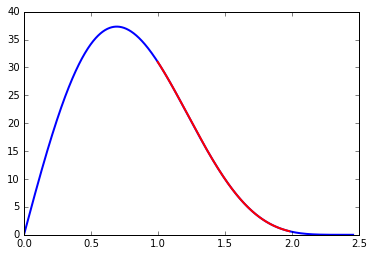

In [5]:
# plots the above 
plt.plot(Xval,Fermi(Xval,1),linewidth=2)
plt.plot(Xval[aa:bb],Fermi(Xval,1)[aa:bb],color='r',linewidth=2)


plt.show()

In [6]:
cd /Users/austinmcdonald/Desktop/AreNeutrinosFermi

/Users/austinmcdonald/Desktop/AreNeutrinosFermi


In [7]:
glob.glob("*.csv")

['exo200.csv']

In [8]:
#importing the digitized data
exo200 = np.genfromtxt('exo200.csv',delimiter=',')
print('Exos counts')
sum(exo200[:,1][2:68])

Exos counts


191039.35044509187

In [9]:
exo200[:,0][2:68]

array([ 1006.22083981,  1021.77293935,  1037.32503888,  1051.32192846,
        1066.87402799,  1080.87091757,  1096.42301711,  1111.97511664,
        1127.52721617,  1141.52410575,  1155.52099533,  1172.62830482,
        1186.6251944 ,  1202.17729393,  1219.28460342,  1231.72628305,
        1247.27838258,  1262.83048212,  1276.8273717 ,  1293.93468118,
        1307.93157076,  1321.92846034,  1335.92534992,  1353.03265941,
        1368.58475894,  1382.58164852,  1396.5785381 ,  1412.13063764,
        1426.12752722,  1441.67962675,  1458.78693624,  1472.78382582,
        1488.33592535,  1500.77760498,  1517.88491446,  1533.437014  ,
        1548.98911353,  1562.98600311,  1578.53810264,  1592.53499222,
        1608.08709176,  1622.08398134,  1637.63608087,  1653.1881804 ,
        1665.62986003,  1682.73716952,  1696.7340591 ,  1712.28615863,
        1726.28304821,  1741.83514774,  1757.38724728,  1772.93934681,
        1788.49144635,  1802.48833593,  1818.04043546,  1833.59253499,
      

100
198237.256845
50
178453.545163
0
160706.143969


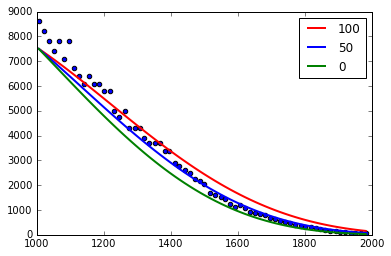

In [10]:
Norm = max(exo200[:,1][2:68])
plt.scatter(exo200[:,0][2:68],exo200[:,1][2:68])
x = exo200[:,0][2:68]*1e-3  #np.linspace(1, 2, 66)

y = Fermi(x,1)/max(Fermi(x,1))*Norm
plt.plot(x*1e3,y*0.87,color='r',linewidth=2,label='100')
print('100')
print(sum(y)*0.87)

y = Fermi(x,0.5)/max(Fermi(x,0.5))*Norm
plt.plot(x*1e3,y*0.87,color='b',linewidth=2,label='50')
print('50')
print(sum(y)*0.87)

y = Fermi(x,0)/max(Fermi(x,0))*Norm
plt.plot(x*1e3,y*0.87,color='g',linewidth=2,label='0')
print('0')
print(sum(y)*0.87)

plt.legend(loc='upper right')
#plt.scatter(x*1e3,y,color='r',linewidth=2)
plt.ylim(0,9e3)
plt.xlim(1000,2000)
plt.show()

100
166204.234887
50
166204.234887
0
166204.234887


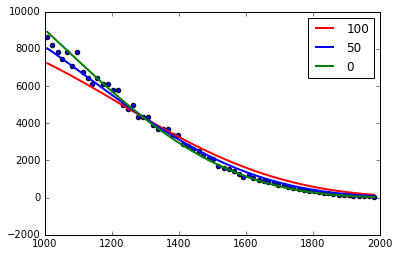

In [11]:
Norm = sum(exo200[:,1][2:68])
plt.scatter(exo200[:,0][2:68],exo200[:,1][2:68])
x = exo200[:,0][2:68]*1e-3  #np.linspace(1, 2, 66)

y = Fermi(x,1)/sum(Fermi(x,1))*Norm
plt.plot(x*1e3,y,color='r',linewidth=2,label='100')
print('100')
print(sum(y)*0.87)

y = Fermi(x,0.5)/sum(Fermi(x,0.5))*Norm
plt.plot(x*1e3,y,color='b',linewidth=2,label='50')
print('50')
print(sum(y)*0.87)

y = Fermi(x,0)/sum(Fermi(x,0))*Norm
plt.plot(x*1e3,y,color='g',linewidth=2,label='0')
print('0')
print(sum(y)*0.87)

plt.legend(loc='upper right')
#plt.scatter(x*1e3,y,color='r',linewidth=2)
#plt.ylim(0,9e3)
plt.xlim(1000,2000)
plt.show()

In [12]:
len(exo200[:,0][2:68])

66

In [13]:
cd /Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH-v3/

/Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH-v3


In [14]:
Expected = None
files = glob.glob('*.txt')
LL = len(files)
Norm = sum(exo200[:,1][2:68])
PFermion = np.linspace(0.0,1.0,LL)
Expected = dict()
for q in range(0,LL):
    Hold = np.genfromtxt(files[q],delimiter=',')
    Expected[q] = Hold/sum(Hold)*Norm

In [15]:
INDEX = np.arange(0,len(Expected),1)
len(INDEX)

1001

In [16]:
ExoX = exo200[:,0][2:68]
ExoY = exo200[:,1][2:68]

In [25]:
ExoY

array([ 8619.53566475,  8203.10923201,  7806.80116535,  7429.63950759,
        7806.80116535,  7070.69925872,  7806.80116535,  6729.10010724,
        6404.0042712 ,  6094.61444353,  6404.0042712 ,  6094.61444353,
        6094.61444353,  5800.1718366 ,  5800.1718366 ,  4999.47880073,
        4757.94431401,  4999.47880073,  4309.31858281,  4309.31858281,
        4309.31858281,  3902.99369277,  3714.43252153,  3714.43252153,
        3714.43252153,  3364.19933341,  3364.19933341,  2899.78361377,
        2759.68946102,  2626.36352765,  2499.47882789,  2263.80340952,
        2154.43469003,  2050.34978483,  1681.92432488,  1600.66730896,
        1523.33597658,  1449.74067037,  1249.60914129,  1131.78371549,
        1189.23810772,  1077.10505604,   928.41454452,   883.5610429 ,
         840.87450067,   800.25022782,   689.77853794,   656.45400317,
         565.83286926,   512.4805877 ,   464.15888336,   400.08340492,
         362.35961115,   328.19278725,   297.24754716,   256.2135834 ,
      

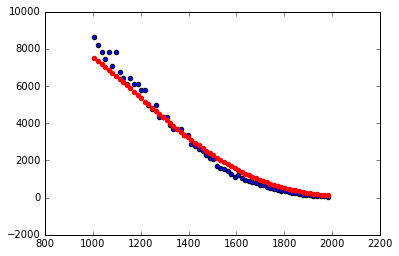

In [17]:
Norm = sum(exo200[:,1][2:68])
plt.scatter(ExoX,exo200[:,1][2:68])
plt.scatter(ExoX,Expected[0],color='r')

In [19]:
def LogLLL(observed,predicted):
    #KillBins = np.where(predicted == 0)[0]
    #Obs = np.delete(observed,KillBins)
    #Pre = np.delete(predicted,KillBins)
    Obs = observed
    Pre = predicted
    A = (Obs * np.log(Pre))
    B = Pre
    #C = np.log(fact(Obs))
    LLH = np.sum(A-B)#-C
    return -LLH

In [20]:
INDEXM = INDEX[0::40]
len(INDEXM)

26

In [21]:
LLH = np.array([]) 
#for x in range(0,len(Expected)):
for q in INDEXM:
    val = LogLLL(ExoY,Expected[q])
    LLH = np.append(LLH,val)

In [22]:
len(LLH)

26

In [26]:
aa = min(LLH)
print('total',len(LLH)-1)
qq = np.where(LLH ==aa)[0][0]
print('index',qq)
print('min val',LLH[qq])
print('min point', PFermion[qq])

total 25
index 3
min val -1414475.36879
min point 0.003


In [27]:
len(Expected)

1001

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


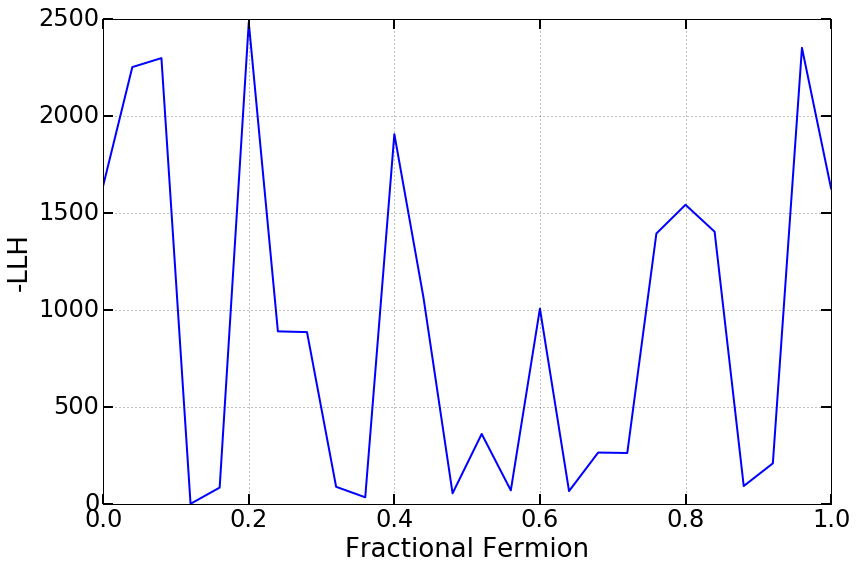

In [28]:
aa = min(LLH)
qq = np.where(LLH ==aa)[0][0]
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(PFermion[0::40],LLH+abs(aa),color='blue',linewidth=2)


plt.ylabel("-LLH",fontsize=26)
plt.xlabel("Fractional Fermion",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.grid(True)
plt.tight_layout()

plt.xlim(0,1)
#plt.savefig('/Users/austinmcdonald/Desktop/FermiLLH100.pdf')

plt.show()

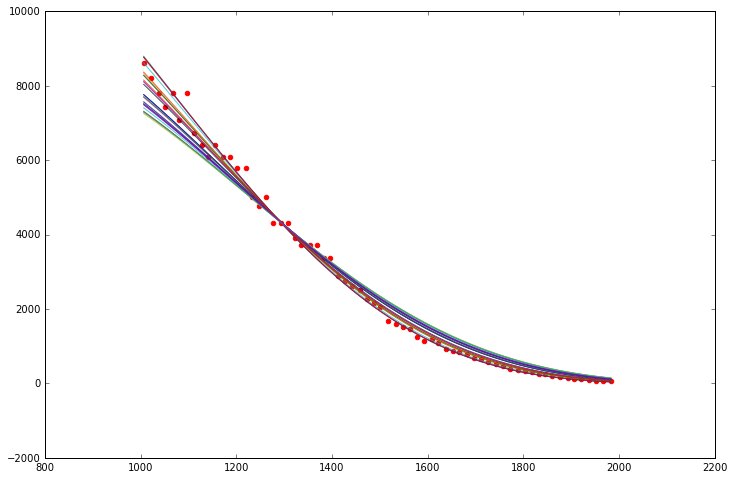

In [29]:
plt.figure(figsize=(12,8))
for q in INDEXM:
    plt.plot(ExoX,Expected[q],alpha=0.7)
plt.scatter(ExoX,exo200[:,1][2:68],color='r')

plt.show()
